In [12]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from IPython.core.display import HTML

In [5]:
images = {}
path = os.path.join("F:\\dumps\\dziki\\boars-research-n-development\\data\\arma_generated\\screenshots\\")
images_dir = os.path.join(path, "img")
annotations_file = os.path.join(path, "sequence_1_bor_pavlovo_screenshots.csv")

for file in os.listdir(images_dir):
    images[file] = plt.imread(os.path.join(images_dir, file))
    
annotations = pd.read_csv(annotations_file)

In [6]:
def get_markers(row_no=0):
    objects = eval(annotations["objects"][row_no])
    objects = filter(
        lambda obj: obj[1] < 1280 and obj[1] > 0 and obj[2] < 720 and obj[2] > 0,
        objects
    )
    objects = map(
        lambda obj: (obj[1], obj[2]),
        objects
    )
    return list(objects)

In [7]:
def show_image(objects, n=1):
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(list(images.items())[n][1])
    plt.scatter(*zip(*objects))

In [8]:
images_list = list(images.items())
def get_annotated_image(n=0):
    markers = get_markers(n)
    image = images_list[n][1]   
    return image, markers

None


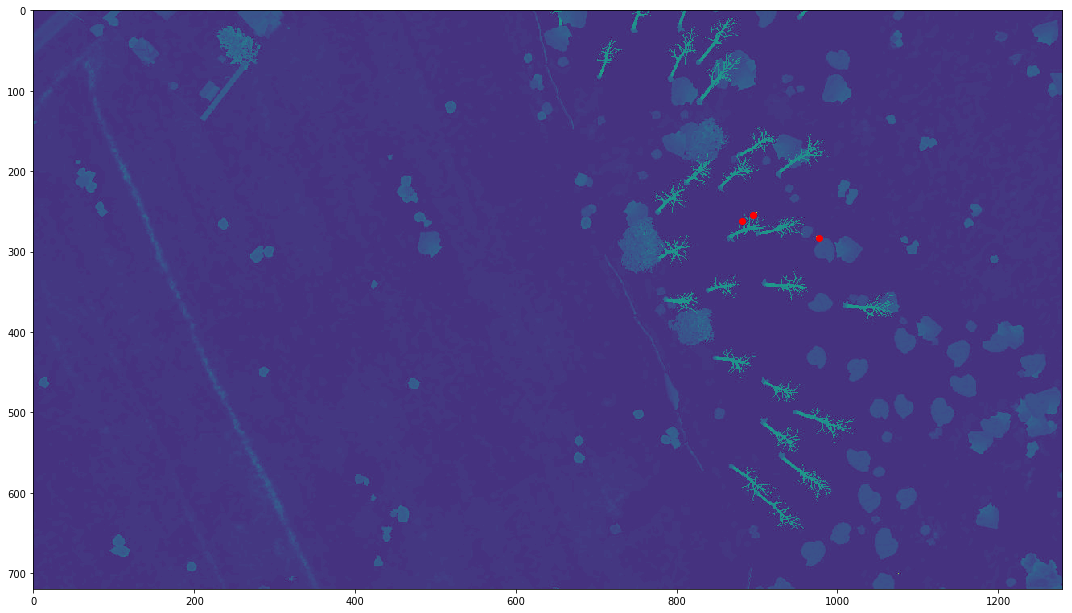

In [23]:
fig = plt.figure(figsize=(15, 15))

image, annotation = get_annotated_image(0)
im = plt.imshow(image, animated=True)
scat = plt.scatter(*zip(*annotation), animated=True, c="r")
plt.tight_layout()
print(scat.get_array())
i = 0

def updatefig(*args):
    global i
    image, annotation = get_annotated_image(i)
    im.set_array(image)
    scat.set_offsets(np.array((annotation)))
    i += 1
    return im, scat

ani = animation.FuncAnimation(fig, updatefig, interval=200, blit=True, frames=100)
plt.show()

ani.save("boars_screenshots.mov")